In [8]:
# 라이브러리 추가
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/KoPubDotumBold.ttf").get_name()
rc('font', family=font_name, size=20)

# 플롯 기본 설정
plt.rcParams["figure.figsize"] = (24,12) # 플롯 크기
plt.rcParams["lines.linewidth"] = True        # 선 두께
plt.rcParams["lines.color"] = 'r'        # 선 색상
plt.rcParams["axes.grid"] = True        # 격자 표시

In [9]:
# 코엔엘파이 추가
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [10]:
# 엑셀파일 읽고 일부 컬럼만 텍스트파일로 저장
data = pd.read_excel('D:/GEODATA/bigkinds.xlsx', sheet_name='sheet')
data = data[['제목']].to_csv('D:/GEODATA/bigkinds.txt', index=False, header=False)

In [11]:
# 텍스트파일 읽기
f = open("D:/GEODATA/bigkinds.txt", 'r', encoding='UTF-8')
lines = f.readlines()
f.close()

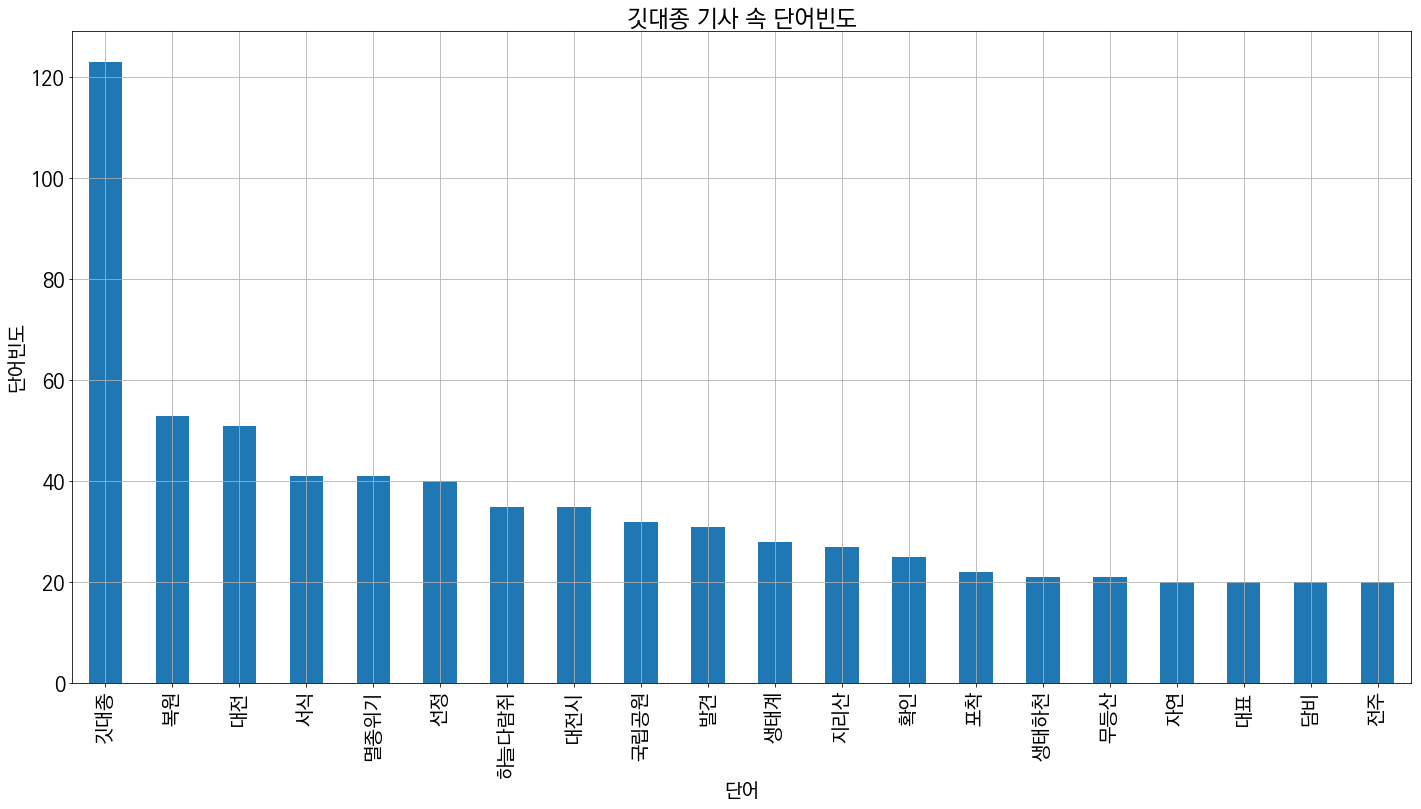

In [12]:
# 단어목록 추출
word = []
for i in range(len(lines)):
    word.append(hannanum.nouns(lines[i]))
    
def flatten(l):
    flatList = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

word_list = flatten(word)
word_list = pd.Series([x for x in word_list if len(x)>1])
word_list.value_counts().head(20).plot(kind='bar')
plt.xlabel('단어')
plt.ylabel('단어빈도')
plt.title('깃대종 기사 속 단어빈도')
plt.savefig('D:/GEODATA/BIGKINDS2_IMG01.png', bbox_inches='tight')
plt.show()

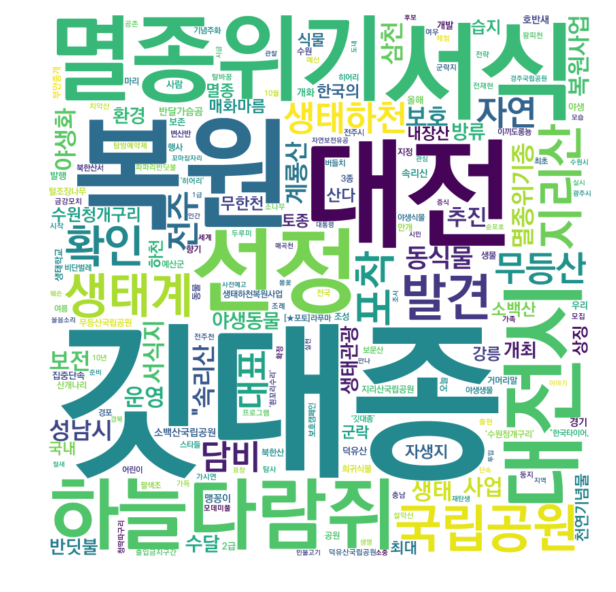

In [13]:
#워드클라우드 생성
from wordcloud import WordCloud
from collections import Counter

font_path = 'c:/Windows/Fonts/KoPubDotumBold.ttf'
wordcloud = WordCloud(font_path=font_path, width=800, height=800, background_color="white")

count = Counter(word_list)
wordcloud = wordcloud.generate_from_frequencies(count)
array = wordcloud.to_array()

fig = plt.figure(figsize=(10,10))
plt.imshow(array, interpolation="bilinear")
plt.axis("off")
plt.savefig('D:/GEODATA/BIGKINDS2_IMG02.png', bbox_inches='tight')
plt.show()

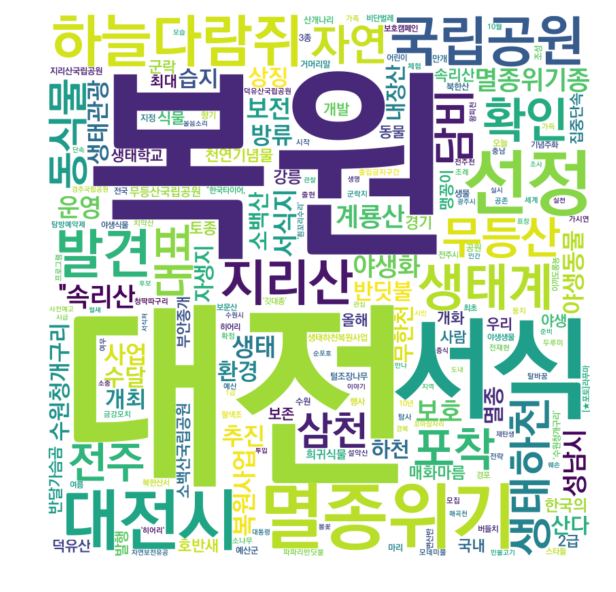

In [14]:
# 제외어 설정
count.pop("깃대종")
wordcloud = wordcloud.generate_from_frequencies(count)
array = wordcloud.to_array()

fig = plt.figure(figsize=(10,10))
plt.imshow(array, interpolation="bilinear")
plt.axis("off")
plt.savefig('D:/GEODATA/BIGKINDS2_IMG03.png', bbox_inches='tight')
plt.show()